# Emergency - 911 Calls Project

For this project will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

____


## Importing Libraries

In [1]:
#Data Manipulations
import numpy as np
import pandas as pd

#Data Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

#Style Visualizations
plt.style.use('ggplot')
rcParams['figure.figsize']=(12,6)
sns.set_style('whitegrid')

## Load the Data Sets

In [2]:
df = pd.read_csv('911_Latest Version.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.shape

(663522, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [7]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**What are the top 5 townships for 911 calls?**

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**How many unique title codes are there?**

In [9]:
df['title'].nunique()

148

## Data Preparation

**In the titles column there are "Reason/Reason Type" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value and "Reason Type" contains the specific reason.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [10]:
df[['reason','reason type']]=df['title'].str.split(':',expand=True)

**Rename the columns of timeStamp to timestamp.**

In [11]:
df.rename({'timeStamp':'timestamp'},axis=1,inplace=True)

In [12]:
df.head()

,lat,lng,desc,zip,title,timestamp,twp,addr,e,reason,reason type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


**What is the most common Reason for a 911 call based off of this new column?**

In [13]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Departments.**

<AxesSubplot: xlabel='reason', ylabel='count'>

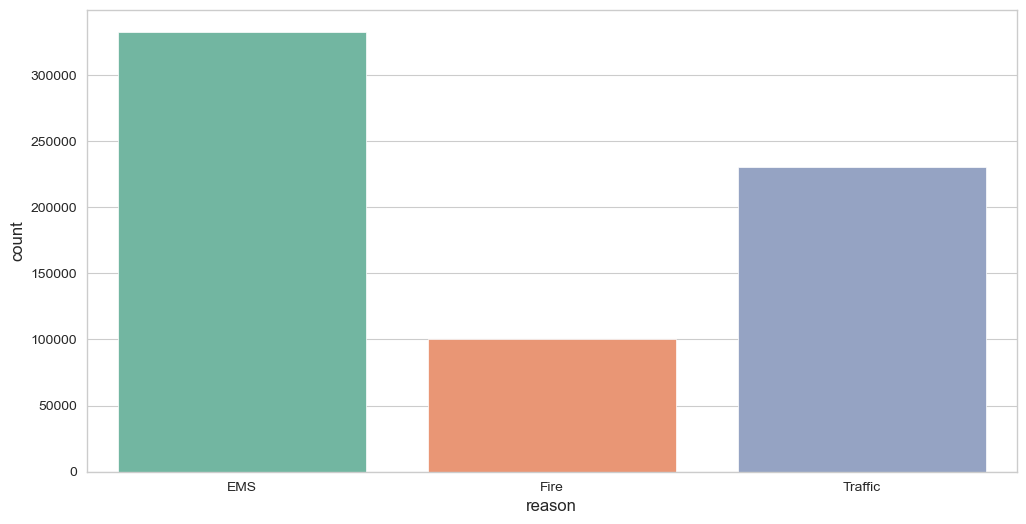

In [14]:
sns.countplot(x='reason', data=df, palette='Set2')

**What is the data type of the objects in the timeStamp column?**

In [15]:
type(df['timestamp'].iloc[0])

str

**Convert the column from strings to DateTime objects.**

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Create 3 new columns called Hour, Month, and Day of Week based on the timeStamp column.**

In [17]:
df['hours'] = df['timestamp'].dt.strftime('%H:%M:%S')

In [18]:
df['months'] = df['timestamp'].apply(lambda t: t.month)

In [19]:
df['year'] = df['timestamp'].apply(lambda t: t.year)

In [20]:
df['days of week'] = df['timestamp'].apply(lambda t: t.dayofweek)

In [21]:
df['date']=df['timestamp'].dt.strftime('%b %Y')

In [22]:
df.head()

,lat,lng,desc,zip,title,timestamp,twp,addr,e,reason,reason type,hours,months,year,days of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17:10:52,12,2015,3,Dec 2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17:29:21,12,2015,3,Dec 2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14:39:21,12,2015,3,Dec 2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,16:47:36,12,2015,3,Dec 2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,16:56:52,12,2015,3,Dec 2015


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df['days of week'] = df['days of week'].map(dmap)

**Create a countplot of the Day of Week column with the hue based on the Reason column.**

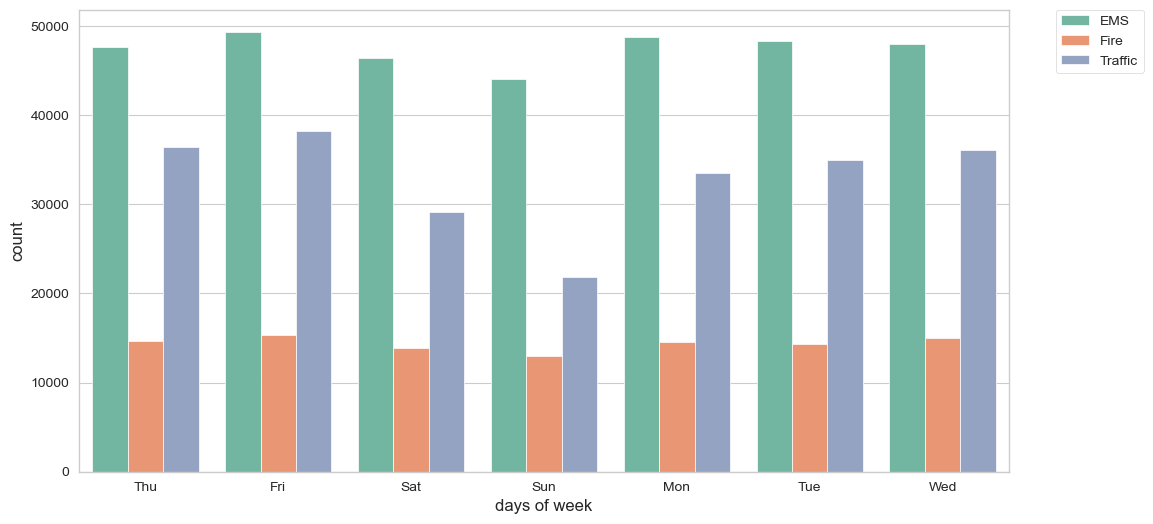

In [25]:
sns.countplot(x='days of week', data=df, hue='reason', palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

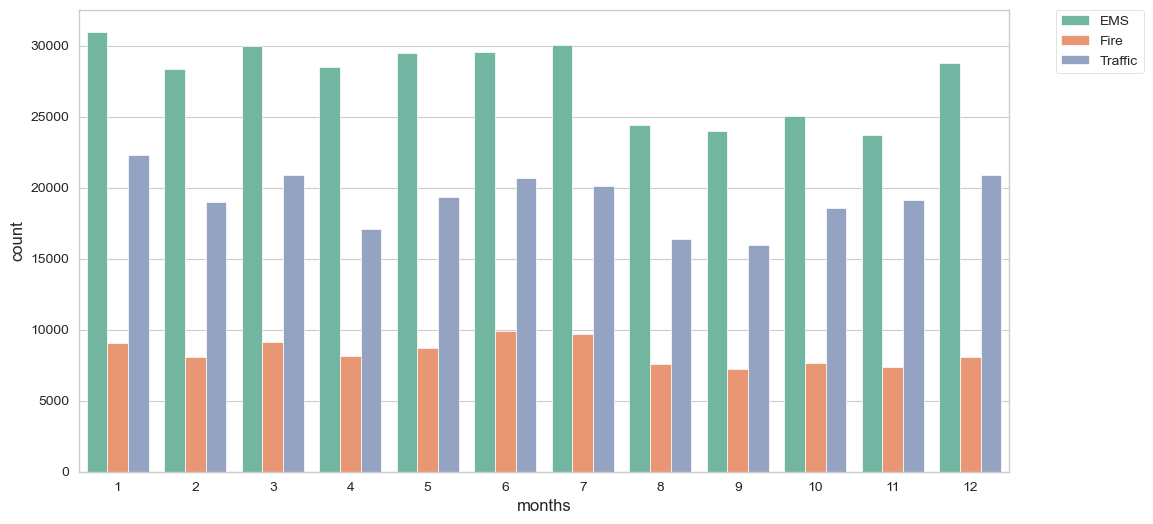

In [26]:
sns.countplot(x='months', data=df, hue='reason', palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now create a groupby object called byMonth, whereby the group the DataFrame by the months column and use aggregation.**

In [27]:
byMonth = df.groupby('months').count()
byMonth.head()

,lat,lng,desc,zip,title,timestamp,twp,addr,e,reason,reason type,hours,year,days of week,date
months,,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509,57509,57509


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot: xlabel='months'>

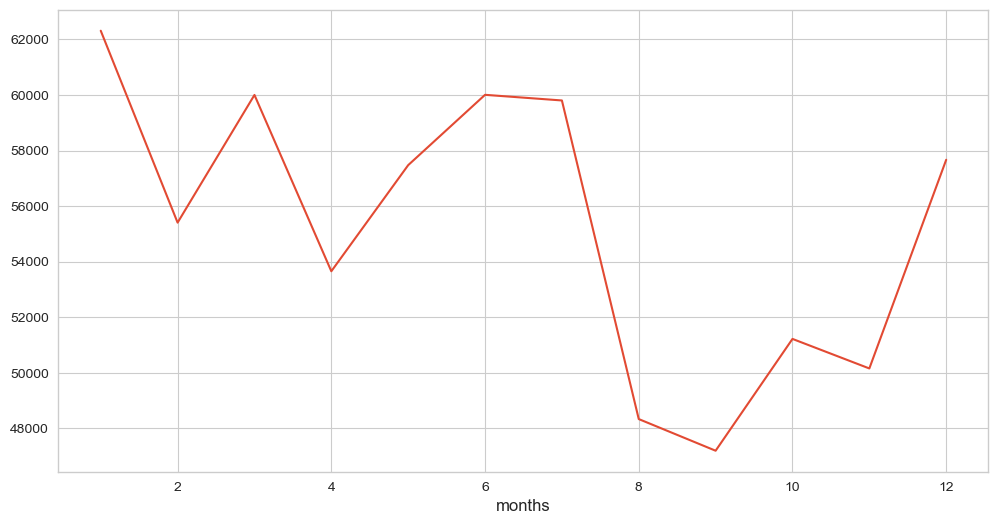

In [28]:
byMonth['twp'].plot()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

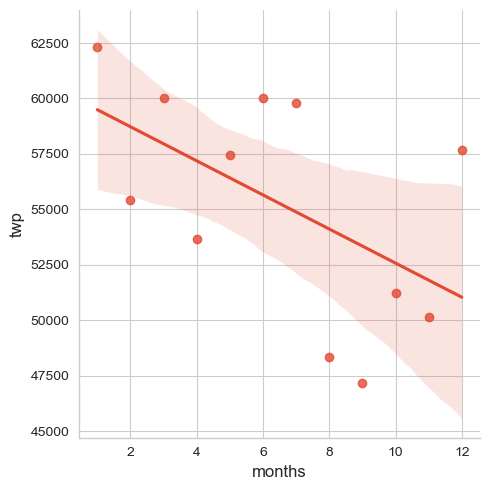

In [29]:
sns.lmplot(x='months', y='twp', data=byMonth.reset_index())

**Now groupby this Date column with the aggregate and create a plot of counts of 911 calls.**

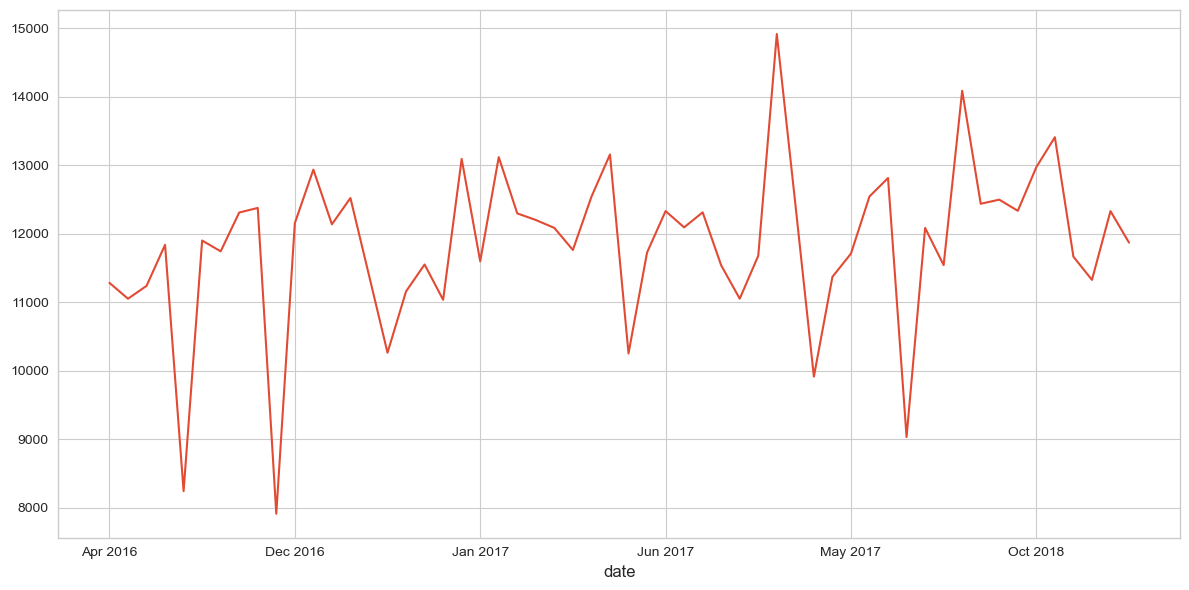

In [30]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.**

In [37]:
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

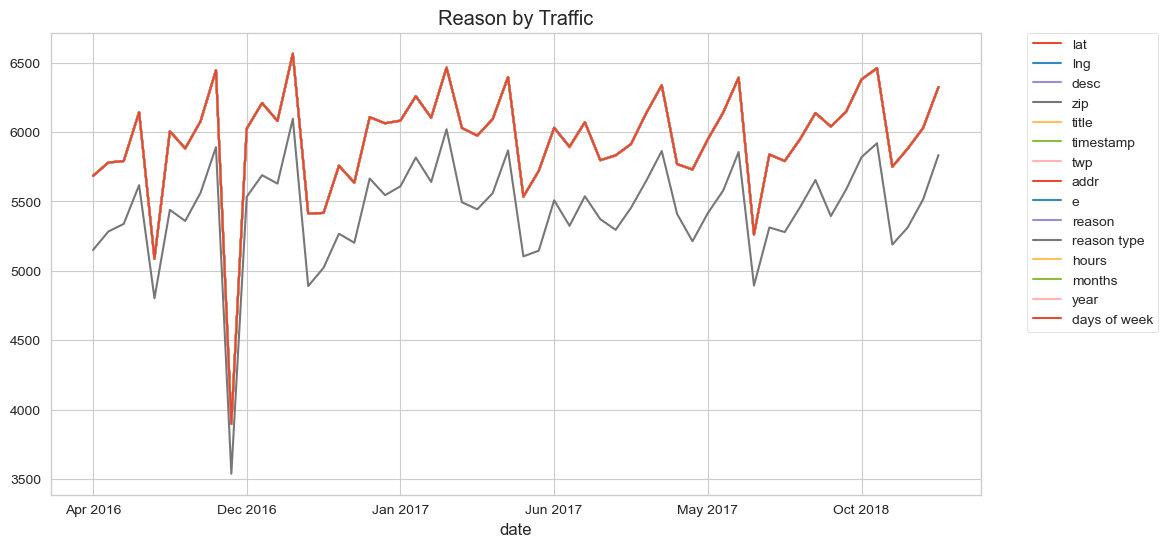

In [38]:
df[df['reason']=='EMS'].groupby('date').count().plot()
plt.title('Reason by Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

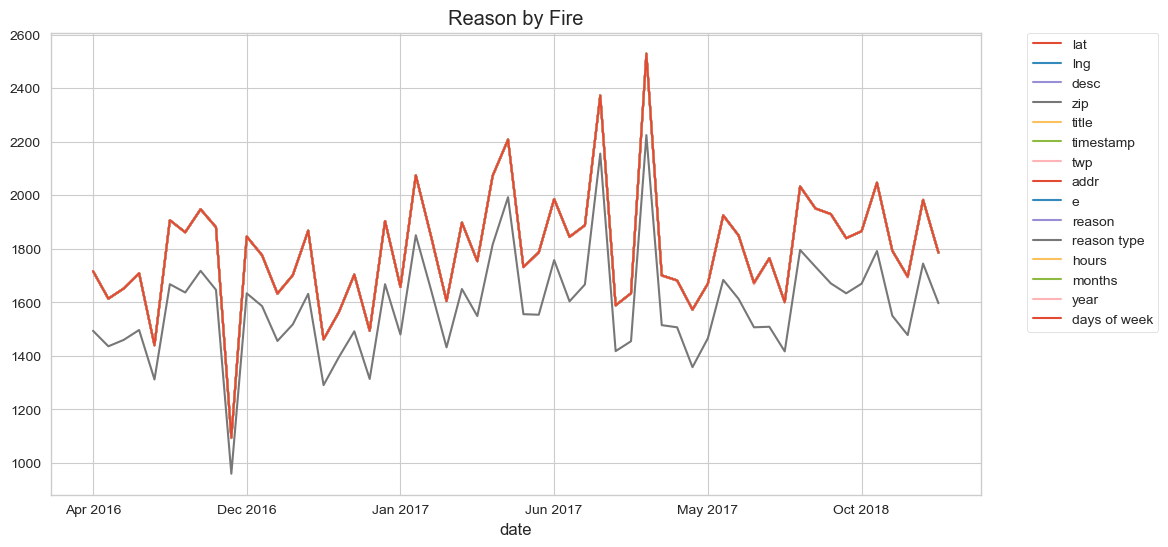

In [35]:
df[df['reason']=='Fire'].groupby('date').count().plot()
plt.title('Reason by Fire')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

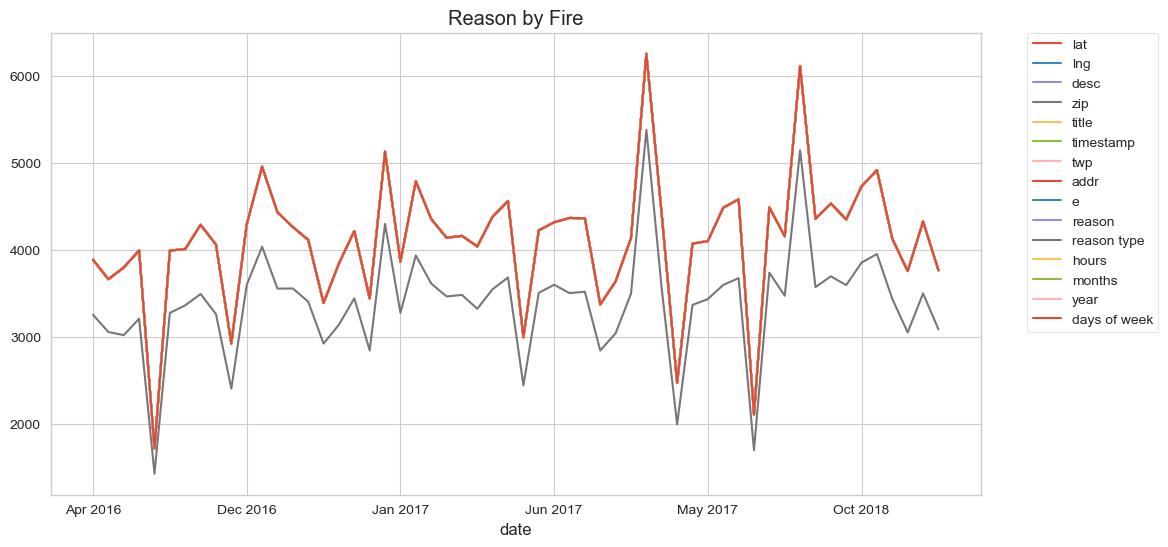

In [41]:
df[df['reason']=='Traffic'].groupby('date').count().plot()
plt.title('Reason by Fire')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [70]:
df['hour'] = df['timestamp'].apply(lambda t: t.hour)

In [71]:
dayHour = df.groupby(by=['days of week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
days of week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


**Now create a HeatMap using this new DataFrame.**

<AxesSubplot: xlabel='hour', ylabel='days of week'>

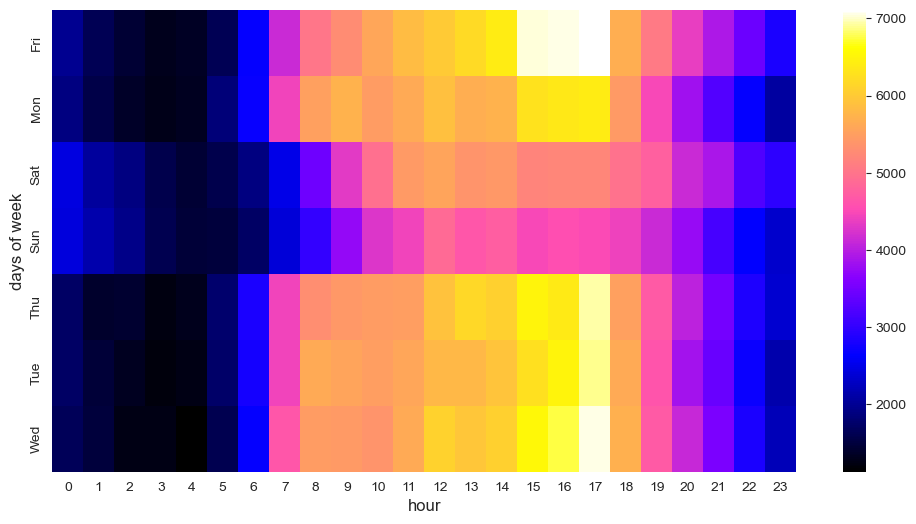

In [82]:
sns.heatmap(dayHour,cmap='gnuplot2')

** Now create a clustermap using this DataFrame. **

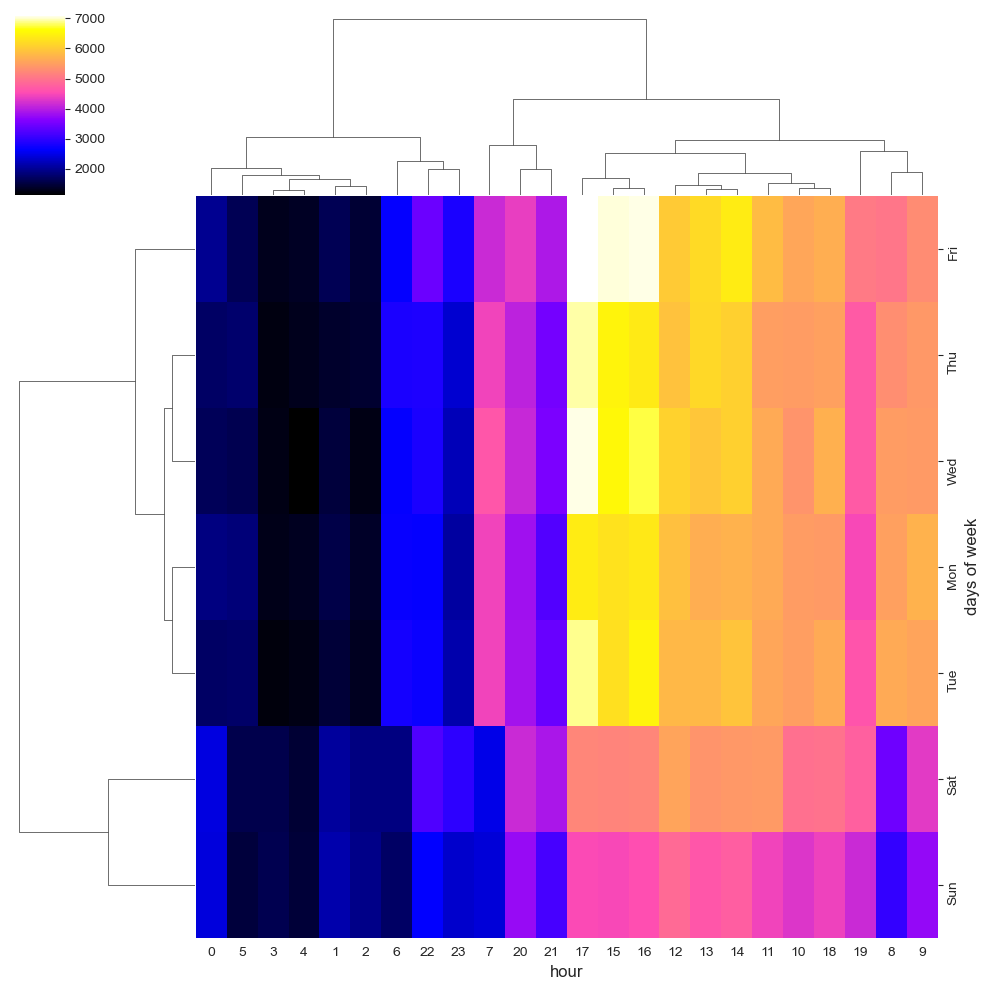

In [76]:
sns.clustermap(dayHour,cmap='gnuplot2')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [74]:
dayMonth = df.groupby(by=['days of week','months']).count()['reason'].unstack()
dayMonth.head()

months,1,2,3,4,5,6,7,8,9,10,11,12
days of week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot: xlabel='hour', ylabel='days of week'>

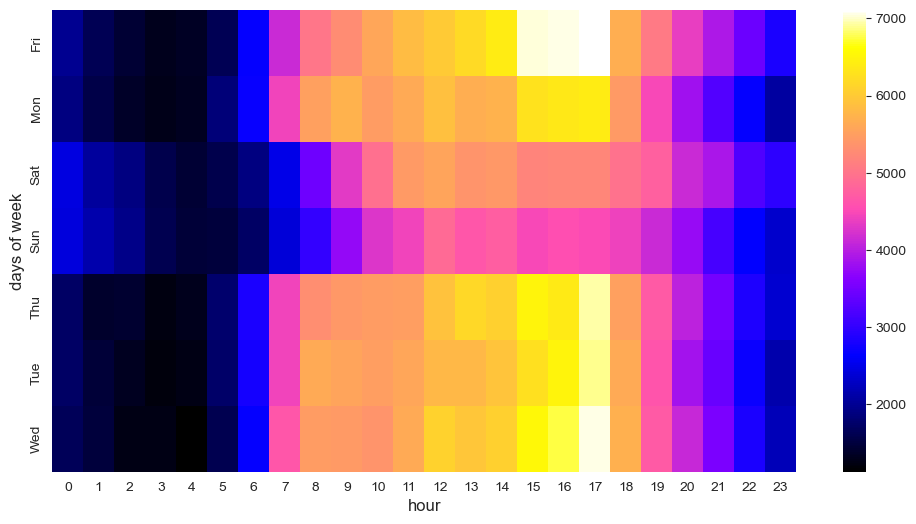

In [75]:
sns.heatmap(dayHour,cmap='gnuplot2')

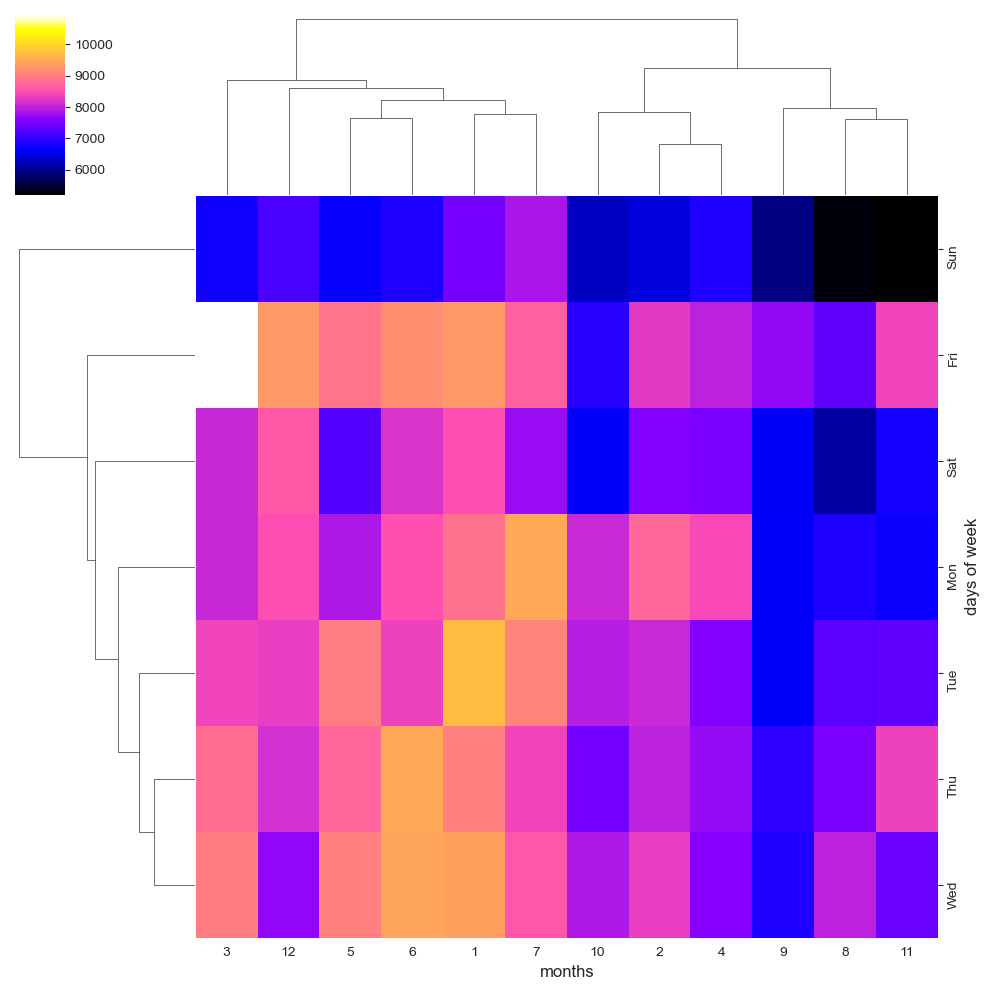

In [83]:
sns.clustermap(dayMonth,cmap='gnuplot2')